In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns
from functions import loadDataFrame

### Load data

In [2]:
names = [
    'Carl',
         'Erik',
         'Ali',
        'Kasper'
        
           ]
df = pd.DataFrame()
for name in names:
    df2 = loadDataFrame(name+'/eksperiment1.csv')
    df = pd.concat([df, df2], ignore_index=True)



# df = loadDataFrame("Ali/eksperkment1.csv", convertToInt=True)

Wait:  0.5  Accuracy:  0.24642857142857144


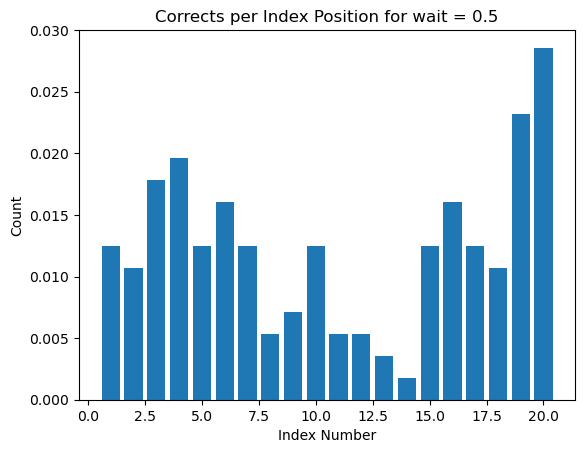

Wait:  1.0  Accuracy:  0.29642857142857143


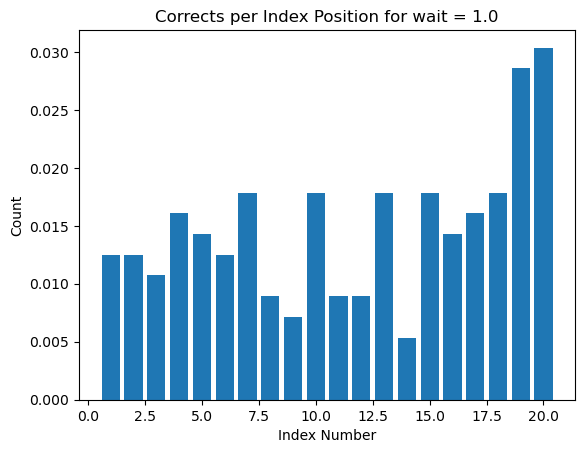

Wait:  1.5  Accuracy:  0.3346153846153846


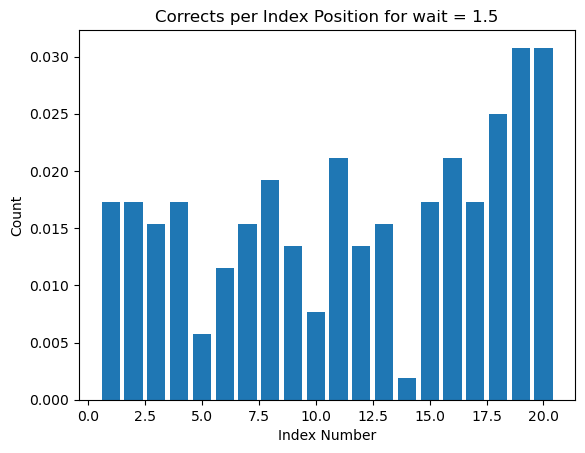

Wait:  2.5  Accuracy:  0.39107142857142857


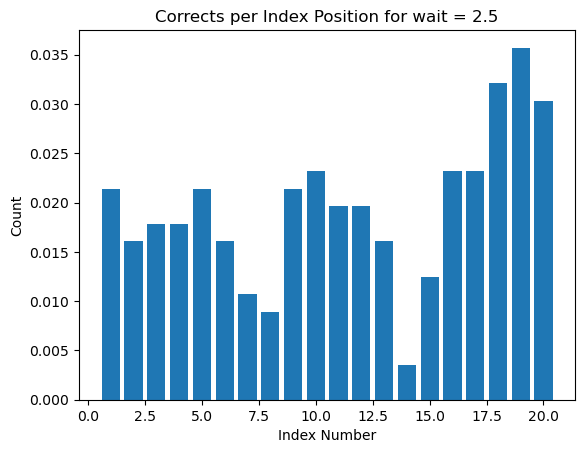

Wait:  4.0  Accuracy:  0.4035714285714286


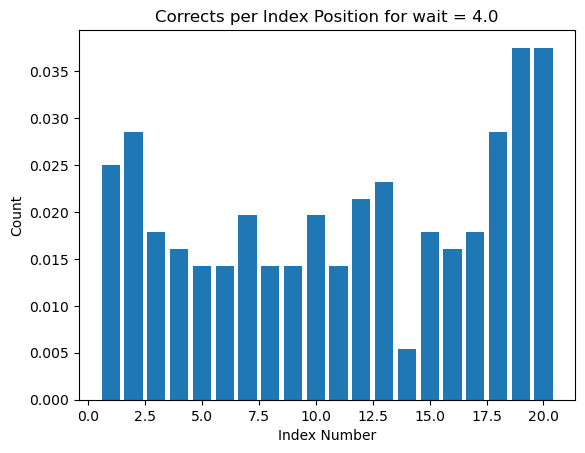

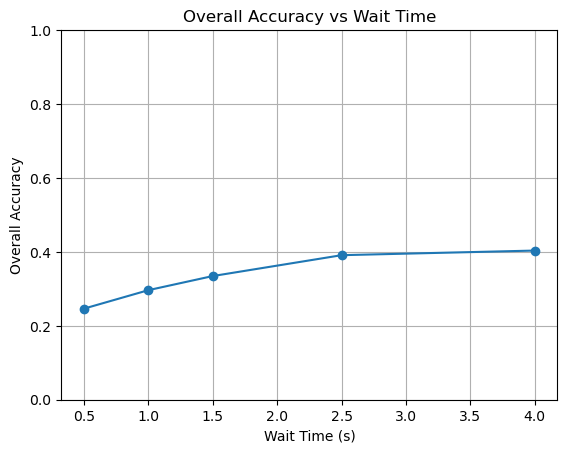

In [3]:
waits = df['wait'].unique()
waitAccuracies = []
for wait in waits:
    df2 = df[df['wait'] == wait]


    indexCorrects = np.zeros(20)
    for idx, row in df2.iterrows():
        # print(row['correctSequence'])
        # print(row['userInput'])
        userAnswered = row['userInput']
        for i, char in enumerate(row['correctSequence']):
            # print(char)
            if char in userAnswered:
                indexCorrects[i] += 1


    accuracy = np.sum(indexCorrects)/ (len(df2) * 20)
    waitAccuracies.append((wait, accuracy))
    print("Wait: ", wait, " Accuracy: ", accuracy)
    normalizedCorrects = indexCorrects / (len(df2) * 20)
    plt.bar(np.arange(1, 21), normalizedCorrects)
    plt.xlabel('Index Number')
    plt.ylabel('Count')
    plt.title('Corrects per Index Position for wait = '+str(wait))
    plt.show()

plt.plot(waits, [x[1] for x in waitAccuracies], marker='o')
plt.xlabel('Wait Time (s)')
plt.ylabel('Overall Accuracy')
plt.title('Overall Accuracy vs Wait Time')
plt.ylim(0, 1)
plt.grid()
plt.show()